<a href="https://colab.research.google.com/github/vignesh7-byte/DataMining/blob/main/2303A51640_simple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
warnings.filterwarnings('ignore')

In [3]:
file_path = 'SLR_Salary_dataset.csv'
data = pd.read_csv(file_path)

In [4]:
data = data.drop('Unnamed: 0', axis=1)


In [5]:
print("Null Values in Dataset:")
print(data.isnull().sum())


Null Values in Dataset:
YearsExperience    0
Salary             0
dtype: int64


In [6]:
print("\nMean:")
print(data.mean())
print("\nMedian:")
print(data.median())
print("\nMode:")
print(data.mode().iloc[0])



Mean:
YearsExperience        5.413333
Salary             76004.000000
dtype: float64

Median:
YearsExperience        4.8
Salary             65238.0
dtype: float64

Mode:
YearsExperience        3.3
Salary             37732.0
Name: 0, dtype: float64


In [7]:
X = data['YearsExperience']
y = data['Salary']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [9]:
X_train_sm = sm.add_constant(X_train)


In [10]:
lr = sm.OLS(y_train, X_train_sm).fit()


In [11]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     352.9
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           9.91e-14
Time:                        08:29:01   Log-Likelihood:                -211.80
No. Observations:                  21   AIC:                             427.6
Df Residuals:                      19   BIC:                             429.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.423e+04   2921.388     

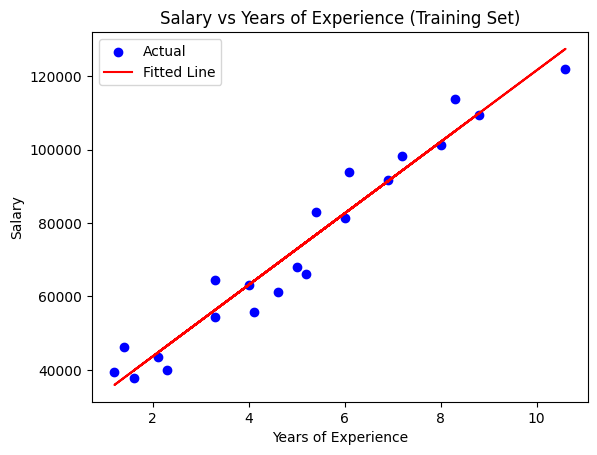

In [12]:
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_train, lr.predict(X_train_sm), color='red', label='Fitted Line')
plt.title('Salary vs Years of Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


In [13]:
X_test_sm = sm.add_constant(X_test)

In [14]:
y_pred = lr.predict(X_test_sm)


In [19]:
# Calculate MSE, RMSE, R-squared, and Adjusted R-squared
mse = mean_squared_error(y_test, y_pred) # Fixed: Removed unexpected indent
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
n = X_test.shape[0]
p = 1  # Number of predictors
adjusted_r_squared = 1 - (1-r_squared) * (n-1) / (n-p-1)

print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)

MSE: 30310299.043402478
RMSE: 5505.479002176148
R-squared: 0.9627668685473266
Adjusted R-squared: 0.9574478497683733
